# Testing 123

In [14]:
# imports
import os
import numpy as np

import torch
import h5py

from matplotlib import pyplot as plt

from ihop.emulators import nn
from ihop.emulators.nn import SimpleNet, DenseNet
from ihop.emulators import io
from ihop.iops.nmf import load_loisel_2023

In [17]:
%matplotlib ipympl

In [2]:
%alias_magic t timeit

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load

## Model

In [3]:
em_path = os.path.join(os.getenv('OS_COLOR'), 'IHOP', 'Emulators')

In [4]:
em_file = os.path.join(em_path, 'densenet_NMF3_L23', 
                       'densenet_NMF_[512, 128, 128]_batchnorm_epochs_2500_p_0.05_lr_0.001.pth')

In [5]:
#model = torch.load(em_file, map_location=torch.device('cpu'))
model = io.load_nn(em_file)

## L23 data

In [7]:
ab, Rs, d_a, d_bb = load_loisel_2023()

In [16]:
list(d_a.keys())

['M', 'coeff', 'spec', 'mask', 'err', 'wave', 'Rs']

# Accuracy

In [8]:
idx = 1000

In [12]:
#ab.shape
Ys = ab[idx]

In [13]:
pred_Rs = model.prediction(Ys, device)

## Check

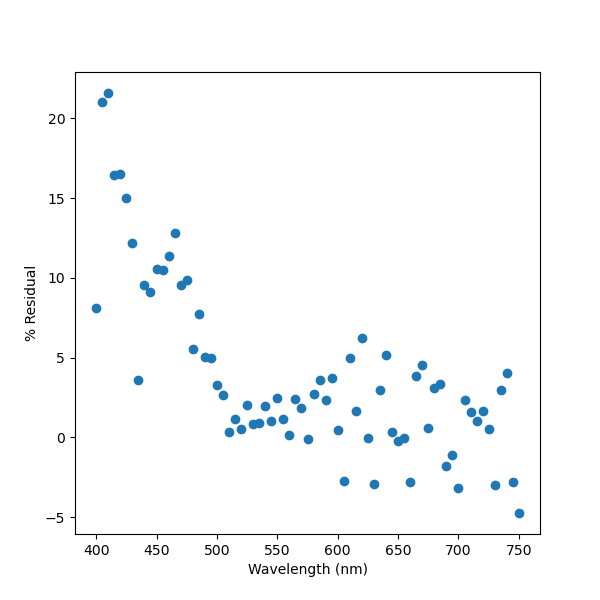

In [19]:
fig = plt.figure(figsize=(6,6))
plt.clf()
ax = plt.gca()
#
ax.plot(d_a['wave'], 100*(pred_Rs-Rs[idx])/Rs[idx], 'o')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('% Residual')

plt.show()